# 시계열모델

In [1]:
# 패키지 불러오기
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as tsa
import plotly.graph_objs as go
import datetime
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 데이터 불러오기

* 데이터는 대분류카테고리로 나뉜 데이터(연령대와 성별, 기기는 전체?로 제외시킨 데이터)

In [2]:
excelFile = 'C:/Users/chunc/Desktop/데이터 샘플/파이널프로젝트 데이터/data_cat_all.xlsx'
df = pd.read_excel(excelFile)
df.head()

,period,디지털/가전,패션의류,가구/인테리어,도서,생활/건강,스포츠/레저,식품,출산/육아,패션잡화,화장품/미용
0,2021-05-10,12.18344,9.68679,5.44947,0.04328,13.94238,7.33006,6.43235,5.15469,10.05799,3.29609
1,2021-05-11,11.39762,9.55987,4.97732,0.10491,13.29577,6.87210,6.27344,4.86485,9.78046,3.15404
2,2021-05-12,11.31013,9.80653,4.82853,0.11601,12.95931,6.64342,5.94068,4.88141,9.74198,3.03323
3,2021-05-13,11.18911,9.89209,4.56359,0.10808,12.32444,6.36751,5.60075,4.93127,9.43991,2.88430
4,2021-05-14,10.88907,9.44241,4.24099,0.09742,11.44237,5.80616,5.05788,4.62662,8.98145,2.70522


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   period   785 non-null    object 
 1   디지털/가전   785 non-null    float64
 2   패션의류     785 non-null    float64
 3   가구/인테리어  785 non-null    float64
 4   도서       785 non-null    float64
 5   생활/건강    785 non-null    float64
 6   스포츠/레저   785 non-null    float64
 7   식품       785 non-null    float64
 8   출산/육아    785 non-null    float64
 9   패션잡화     785 non-null    float64
 10  화장품/미용   785 non-null    float64
dtypes: float64(10), object(1)
memory usage: 67.6+ KB


In [4]:
# period컬럼의 데이터타입 변경
df['period'] = pd.to_datetime(df['period'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   period   785 non-null    datetime64[ns]
 1   디지털/가전   785 non-null    float64       
 2   패션의류     785 non-null    float64       
 3   가구/인테리어  785 non-null    float64       
 4   도서       785 non-null    float64       
 5   생활/건강    785 non-null    float64       
 6   스포츠/레저   785 non-null    float64       
 7   식품       785 non-null    float64       
 8   출산/육아    785 non-null    float64       
 9   패션잡화     785 non-null    float64       
 10  화장품/미용   785 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 67.6 KB


<Axes: xlabel='period'>

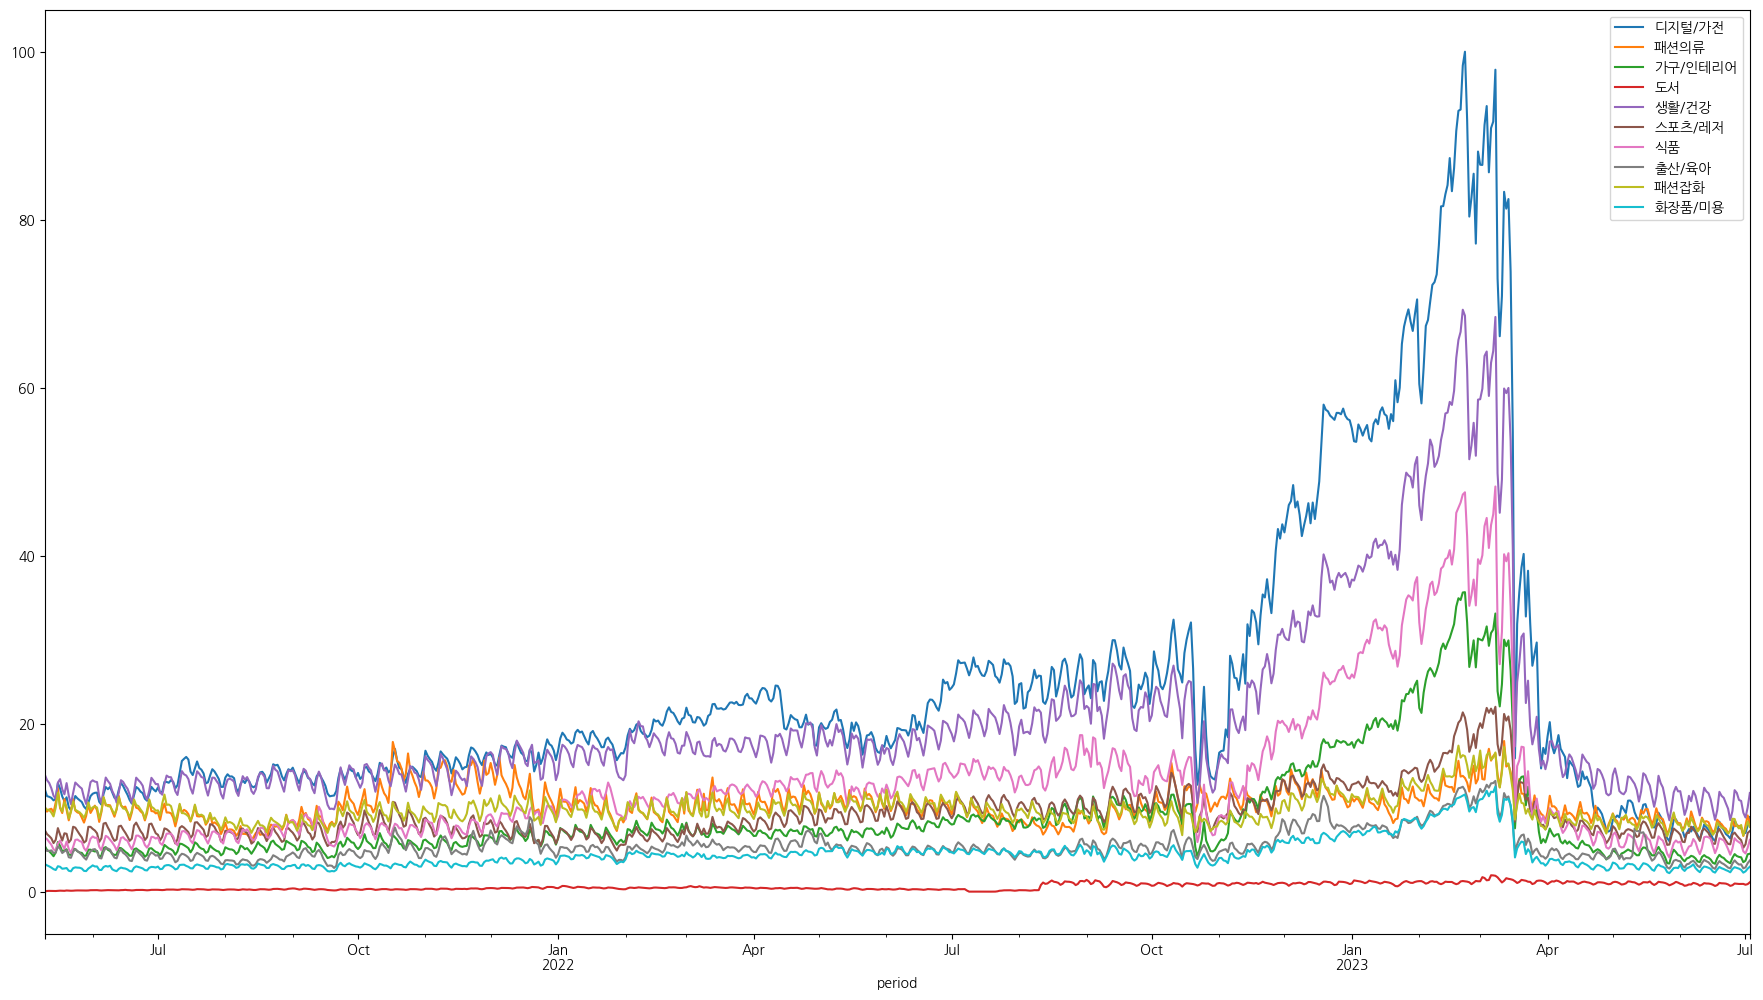

In [5]:
# 전체 카테고리 시계열 그래프
df.plot(x = 'period', figsize = (22, 12))

* 디지털/가전 카테고리의 클릭량만을 확인

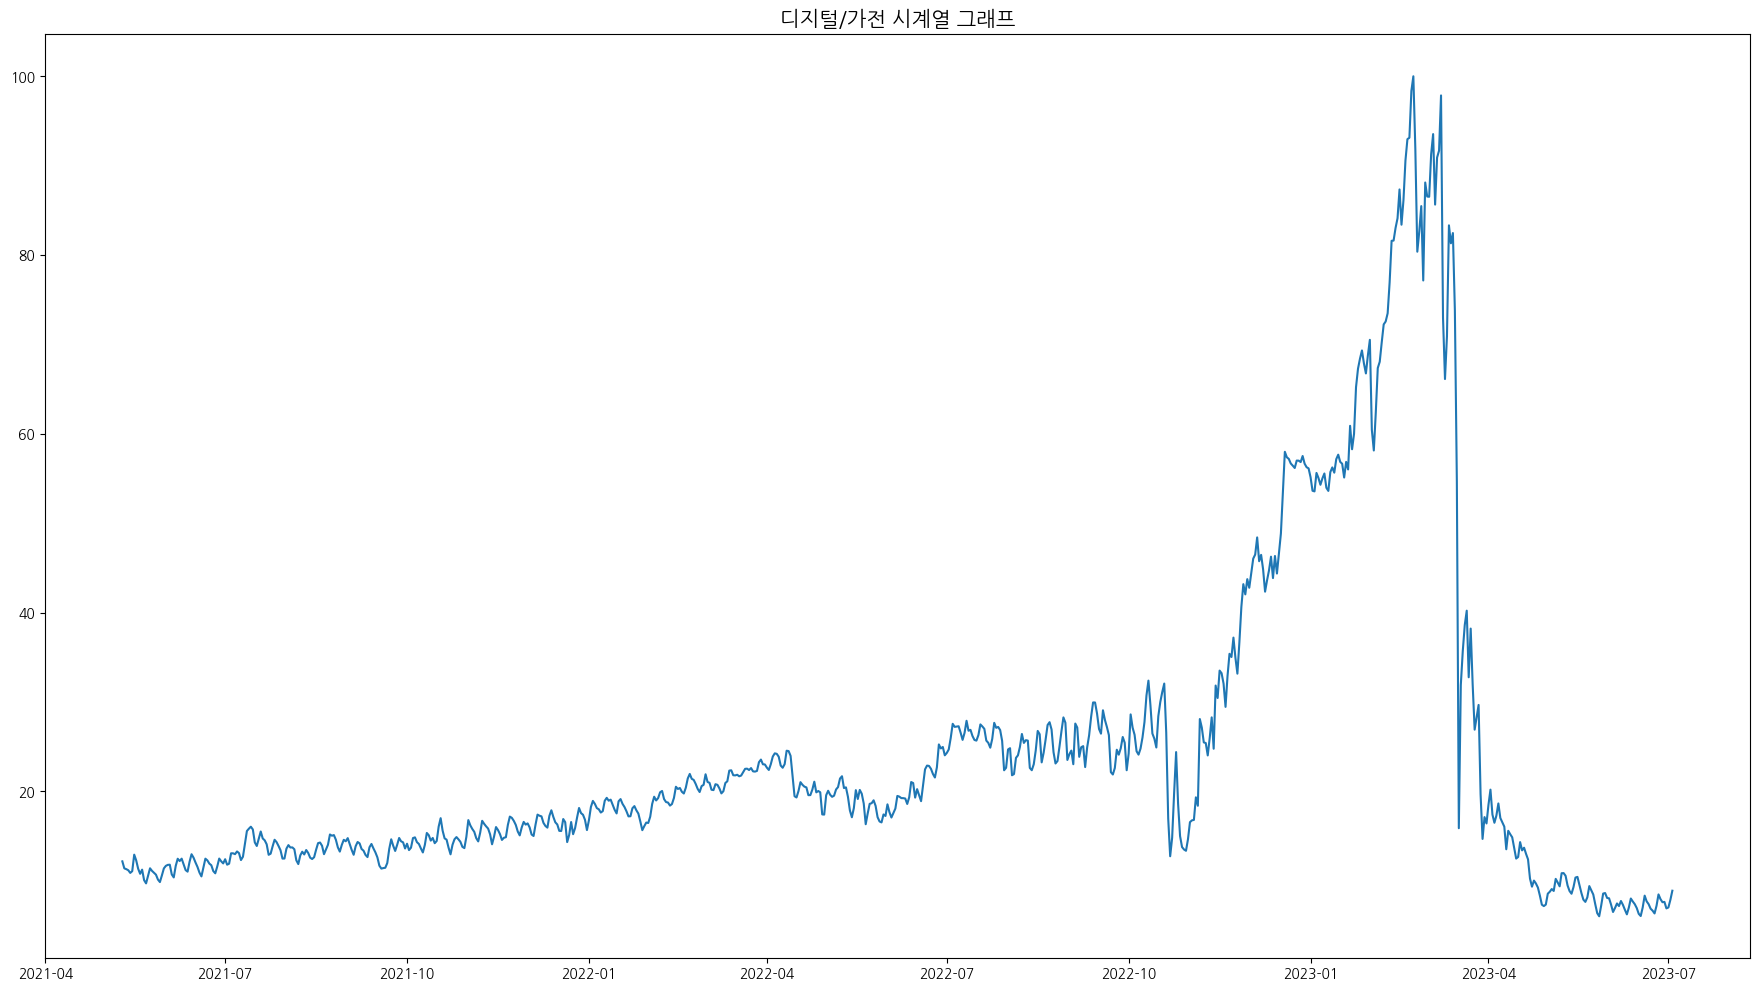

In [6]:
# 디지털/가전 항목의 시계열 그래프
plt.figure(figsize = (22, 12))
plt.plot('period','디지털/가전', data = df)
plt.title('디지털/가전 시계열 그래프', fontsize = 15)
plt.show()

* 일정한 주기가 보이지 않는 비정상 시계열로 보여짐
* 세분화해서 데이터를 보고자 분해법을 사용

## 분해법

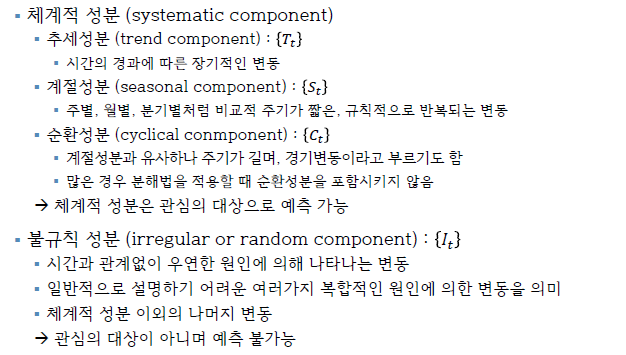

In [7]:
# 디지털/가전 항목의 시계열 데이터 프레임 생성
# ts_df1 = pd.pivot_table(data = df, index = 'period', values = '디지털/가전').reset_index()
# ts_df1.set_index('period')
timeSeries = df.loc[:, ['period', '디지털/가전']]
timeSeries.index = timeSeries.period
ts = timeSeries.drop('period', axis = 1)

* 분해법엔 가법(addictive)와 승법(multiplicative) 두가지가 있다.
* 가법의 경우, 원본데이터가 일정하고 안정적인 그래프를 그리는 경우에, 승법은 증가하거나 감소하는 형태를 띌 때 사용한다.
* 디지털/가전의 경우 명확히 증가하고 감소하는 구간이 존재하지만 전반적으로 일정한 추세를 띈다고 판단되어 가법을 사용했다.

D:\Anaconda\envs\pythonEx\lib\site-packages\statsmodels\tsa\seasonal.py:359: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
D:\Anaconda\envs\pythonEx\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

D:\Anaconda\envs\pythonEx\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


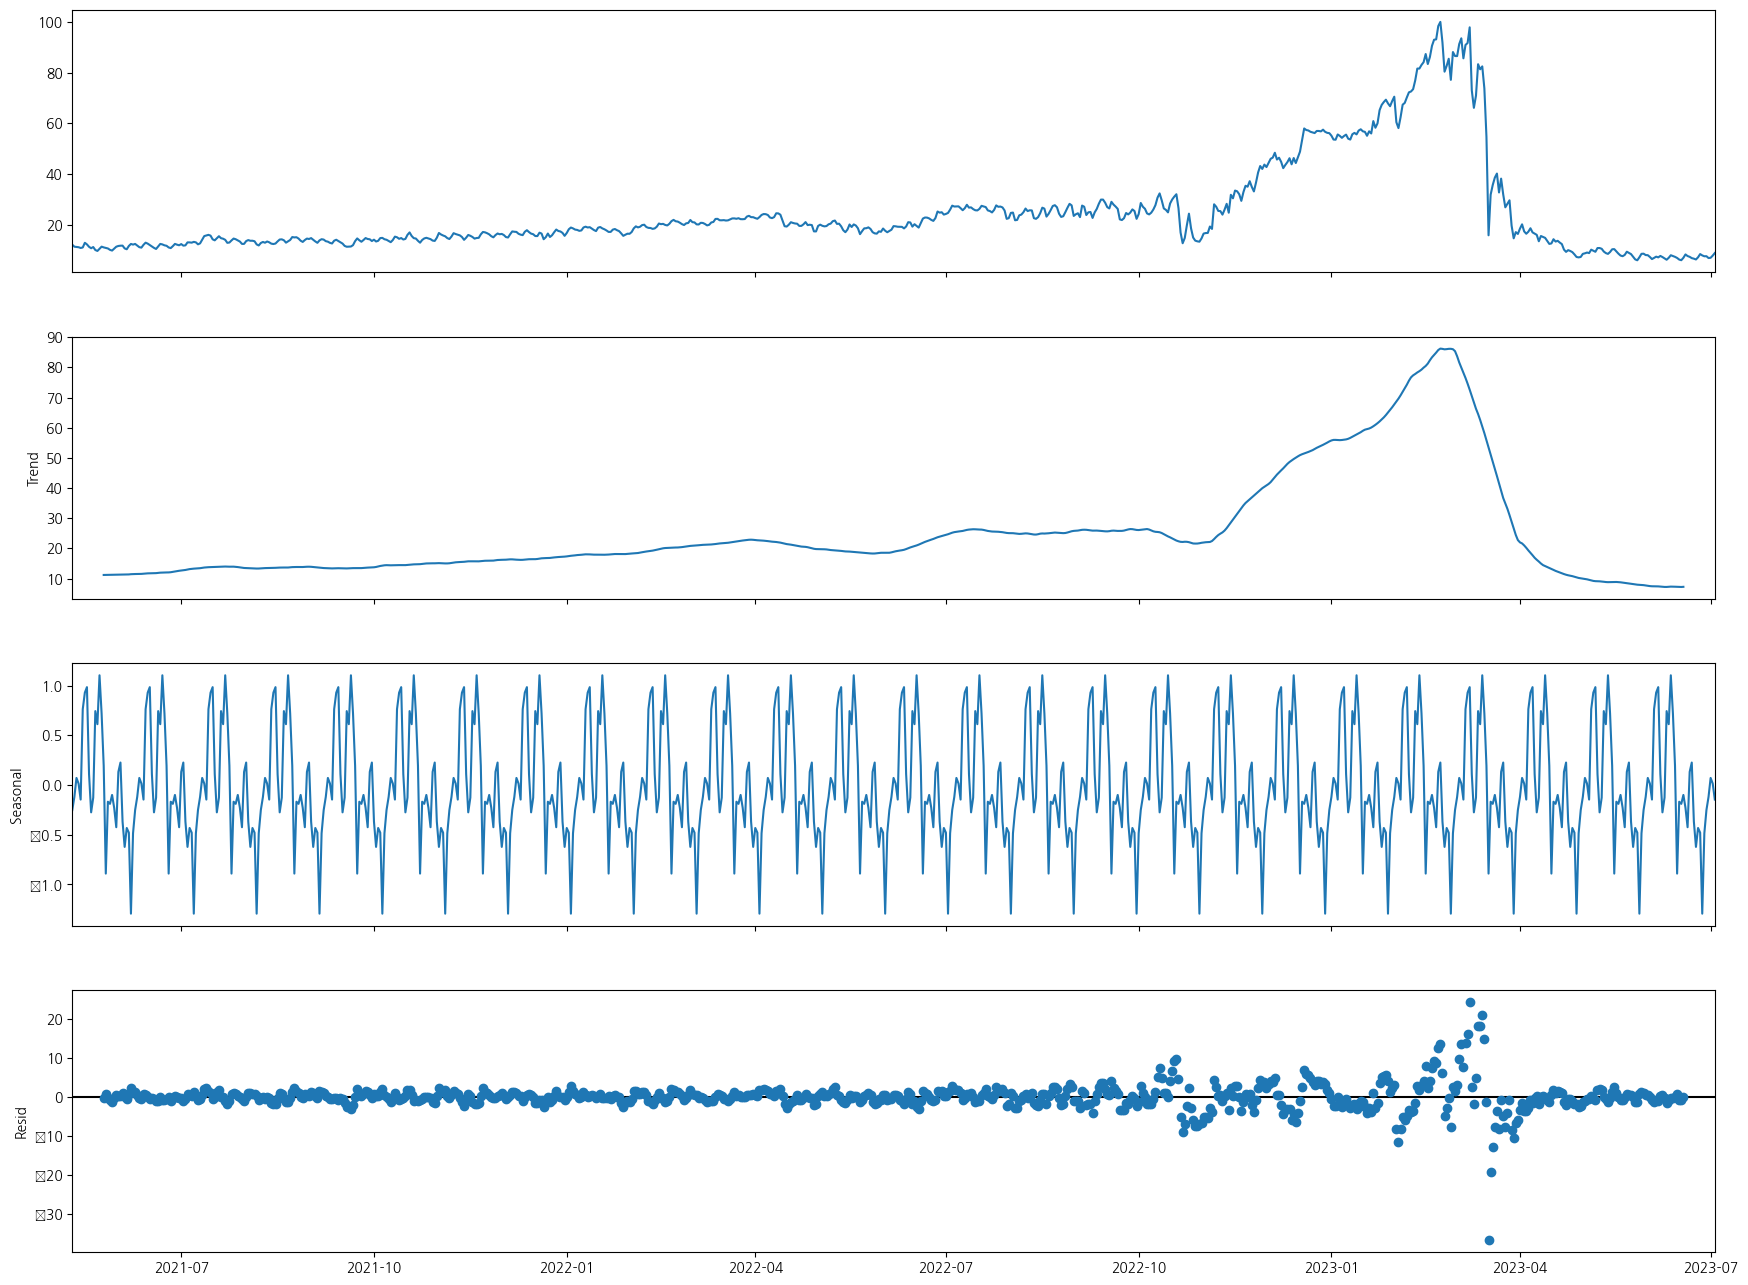

In [8]:
# 디지털/가전 항목의 분해
# 일별 데이터이므로 데이터의 주기를 30 또는 31로 설정
# 주별 -> 7, 분기별 -> 4, 월별 -> 12
result = seasonal_decompose(ts, model = 'additive', period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20, 14)

### 분해법 결과

* 분해법을 통해 데이터의 성분을 확인해보면, 먼저 Trend의 그래프로는 일정주기에 급상승한 이후, 다시 기존의 클릭률로 회귀하는 추세가 보인다.
* 다음으로 Seasonal 그래프를 보면 일정주기마다 동일한 패턴이 지속되는 것으로 보아, 계절성을 지닌 데이터로 판단된다.
* 비정상 데이터인지 세부확인을 위해 자기상관함수 및 부분자기상관함수(편자기상관함수), 단위근 검정을 통해 확인하고자 한다.


## ACF, PACF 그래프

* 참고 블로그: https://datalabbit.tistory.com/112

### 자기상관성
* 시계열 자료가 다른 자료, 대표적으로 횡단면 자료와 가장 큰 차이를 보이는 것은 바로 자료의 index가 시간(Time)이라는 것이고, 이로 인해 현재의 상태가 과거, 미래의 상태와 매우 밀접한 관련을 갖고 있다는 것

* 즉, **시간의 흐름에 따라 독립적이지 않다**는 것(오늘 주식의 가격이 어제의 가격에 영향을 받고, 내일의 가격에 영향을 주는 것처럼)

* 이러한 경우 시계열 자료는 자기상관관계를 갖는다고 한다.

### 자기상관함수
* 시차에 따른 일련의 자기상관을 의미, 시차가 커질수록 ACF는 0에 가까워짐
* 정상시계열의 경우 상대적으로 빠르게 0에 수렴하며, 비정상시계열의 경우 천천히 감소하고, 종종 큰 양의 값을 가진다.

### 부분자기상관함수
* 시차에 따른 일련의 편자기상관, 시차가 다른 두 시계열 데이터 간의 순수한 상호 연관성

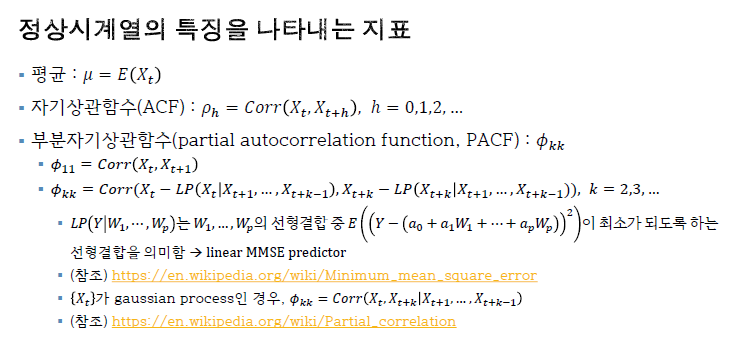

## 디지털/가전의 자기상관함수(ACF), 부분자기상관함수(PACF)

D:\Anaconda\envs\pythonEx\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


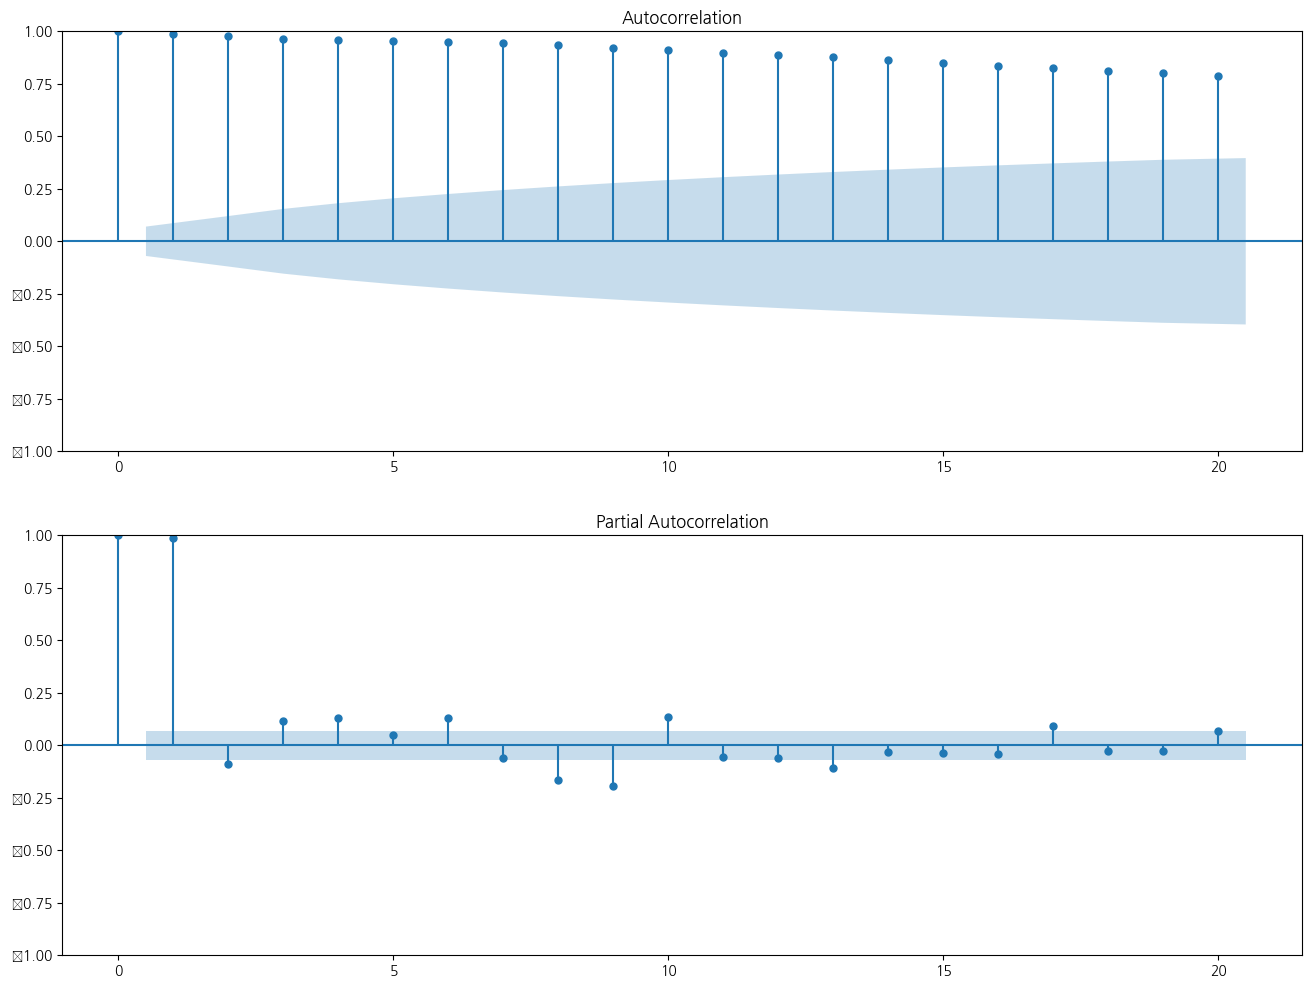

In [9]:
fig = plt.figure(figsize = (16, 12))

# ACF 그래프
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(ts, lags = 20, ax = ax1)

# PACF 그래프
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(ts, lags = 20, ax = ax2)

plt.show()

### 자기상관함수(ACF), 부분자기상관함수(PACF) 결과
* ACF의 경우, 매우 천천히 0으로 수렴하는 경향이 보인다.
* PACF를 확인해봤을 때 역시 시차에 따라 0에 수렴하는 값이 적음을 알 수 있다.
* 이를 통해 디지털/가전의 데이터는 비정상 시계열의 형태를 보인다고 판단할 수 있다.

## 단위근 검정

* 가설검정: h0: 정상성 만족x vs h1: 정상성 만족

In [10]:
# 디지털/가전
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values: ')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.711796
p-value: 0.072019
Critical Values: 
	1%: -3.439
	5%: -2.865
	10%: -2.569


### 단위근 검정 결과

* p-value값이 유의수준 0.05보다 훨씬 크므로, 귀무가설을 기각하지 못한다. 즉, 정상성을 만족하지 못하는 비정상 시계열임을 다시한번 확인할 수 있다.

## 모델 적용

* 비정상 시계열이므로, 만약 변동폭이 일정하지 않다면 로그변환, 추세, 계절성이 존재하는 경우 차분을 사용 이후 모델을 적용시키는 것이 효율적
* 계절성이 존재하는 데이터임을 위에서 확인했으며, 파이썬과 R 모두 Auto_arima라고 하여, AR모델과 MA모델의 차수, 차분의 횟수를 학습해주어 최적의 모델을 찾아주는 메서드를 활용하고자 한다.(다른 분류모델이나 회귀모델에서도 그리드탐색을 통해 최적의 파라미터를 찾는 것처럼)
* 또한 계절성을 고려해주는 SARIMA모델을 사용하여 arima보다 좋은 예측모델을 구현하고자 함
* 데이터수가 785의 행으로 비교적 작은 사이즈라, train, test데이터셋으로 분할하지 않고 진행했음

### AR모델, MA모델, ARIMA모델
* 자기회귀모형(AR): 자기 자신의 과거 값이 이후 자신의 값에 영향을 주는 모델, 이전 자신의 관측값이 이후 자신의 관측값에 영향을 준다는 아이디어에 기반
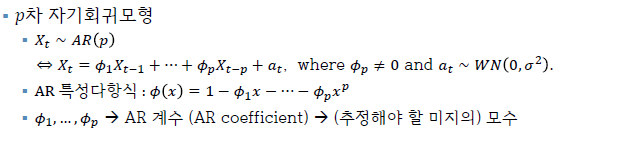

* 이동평균모형(MA): 현재 데이터가 과거 백색잡음의 선형 가중합으로 구성되는 모델, 예측오차를 이용하여 미래를 예측하는 모형
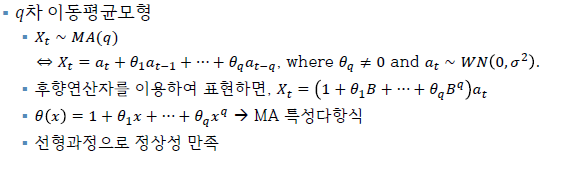

* ARIMA(p,d,q)모형: d차 차분한 데이터에 AR(p)모형과 MA(q)모형을 합친 모형
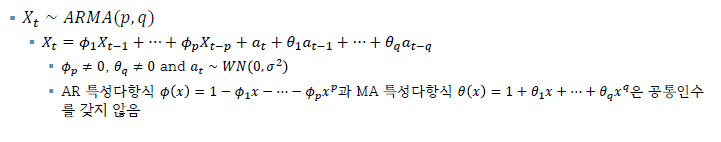

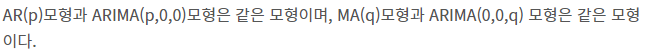

### SARIMA 모델

* 기존 ARIMA모델에서 Seasonal Component(계절성분)까지 고려한 개선 모델)

In [11]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [12]:
# Step 1: auto_arima를 사용하여 최적의 SARIMA 모델 찾기
# order(p, d, q): p = AR 자기회귀의 차수, d: 차분의 차수, q: 이동평균의 차수
# m = : 일별이면 m = 1, 주별이면 m = 7, 월별이면 m = 12, 주별이면 m = 52
# trace = True를 사용할 경우 파라미터 추출과정이 결과에 같이 나옴
# stepwise=True로 설정하면, SARIMA 모델의 파라미터를 단계적으로 선택하는 단계적 방법을 사용
# 다중회귀에서 전진선택, 후진제거, 단계적선택 등의 방법처럼 독립변수를 고르는 것처럼
# auto_arima에서도 AIC 또는 BIC와 같은 정보 기준을 기반으로 모델의 성능을 평가하여
# 최종적으로 최적의 파라미터를 선택
model_fit = auto_arima(ts, seasonal = True, m = 1, suppress_warnings = True, stepwise = True)

# 최적 모델의 파라미터 출력
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  785
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -1847.067
Date:                Fri, 21 Jul 2023   AIC                           3704.134
Time:                        15:30:40   BIC                           3727.457
Sample:                    05-10-2021   HQIC                          3713.102
                         - 07-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2013      0.021     57.026      0.000       1.160       1.243
ar.L2         -0.9262      0.022    -43.011      0.000      -0.968      -0.884
ma.L1         -1.1631      0.027    -42.642      0.0

* auto_arima를 통해 찾아낸 최적의 파라미터는 1차 차분을 진행한 모델이며, 차수가 2인 ar(2)모델과 차수가 2인 ma(2)모형이 합쳐진 SARIMA(2, 1, 2)모델이다.

#### 추가적으로 모델이 정상시계열로 알맞게 변환되었는지 확인
* Ljung-Box (Q): 0.00<br>
Ljung-Box 검정은 자기상관이 존재하는지 여부를 확인하는 검정 방법. 여기서 Q 값이 0.00이므로, 시계열 데이터가 자기상관을 가지고 있지 않음을 의미. 즉, 데이터가 랜덤하게 배치되어 있다는 것을 나타낸다.

* Jarque-Bera (JB): 180170.74<br>
Jarque-Bera 검정은 데이터의 정규성을 확인하는 검정 방법 중 하나이다. JB 값이 180170.74이고, 그에 해당하는 Prob(JB)가 0.00으로 나타나므로, 데이터가 정규분포를 따르지 않음을 의미.

* Heteroskedasticity (H): 50.94<br>
이 값은 이변량 데이터가 등분산성(homoskedasticity)를 가지는지를 확인하는 검정의 통계량. Prob(H)가 0.00으로 나타나므로, 데이터는 등분산성을 가지지 않음을 의미.

* Skew: -5.27<br>
Skewness(비대칭도)는 데이터의 비대칭 정도를 나타내는 지표. 음수 값인 -5.27은 데이터가 왼쪽으로 꼬리가 긴 분포를 가지고 있음을 의미.

* Kurtosis: 76.52<br>
Kurtosis(첨도)는 데이터의 꼬리 부분의 뾰족함을 나타내는 지표. 매우 높은 값인 76.52는 꼬리가 매우 뾰족한 분포를 가지고 있음을 의미.

* 위의 결과를 통해 SARIMA(2, 1, 2)모델은 정상 시계열로 간주해도 된다고 볼 수 있다.

#### 궁금해서 ChatGPT에 물어본 내용
* SARIMA 모델은 일반적인 ARIMA 모델에 계절성 요소가 추가된 모델이므로, SARIMAX(p, d, q)(P, D, Q, m)와 같은 형태로 표현됩니다. 여기서 p, d, q는 ARIMA 모델의 비계절성 파라미터이며, P, D, Q는 계절성 파라미터이고, m은 계절성 주기를 나타냅니다.
* auto_arima 함수는 AIC나 BIC와 같은 정보 기준을 사용하여 최적의 모델을 선택하므로, SARIMAX(2, 1, 2)와 같은 결과가 나온다면 해당 모델이 주어진 데이터에 대해 상대적으로 좋은 예측 성능을 가진 최적의 계절성을 고려한 SARIMA 모델로 간주할 수 있습니다.

따라서, SARIMAX(2, 1, 2)와 같은 모델이 나온 경우에도 계절성을 고려한 SARIMA 모델이라고 생각하시면 됩니다. 그러나 실제 데이터에 적합한 모델인지 확인하기 위해 예측 성능을 평가하고, 필요에 따라 추가적인 모델 튜닝을 수행하는 것이 좋습니다

### 잔차분석

D:\Anaconda\envs\pythonEx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\pythonEx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\pythonEx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


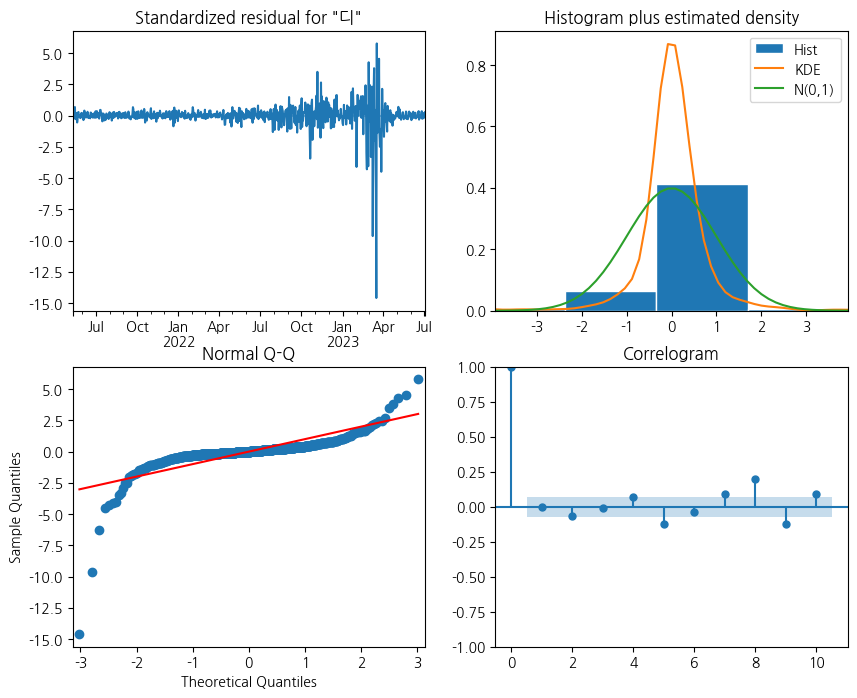

In [13]:
model_fit1 = sm.tsa.ARIMA(ts, order=(2, 1, 2)).fit()

# plot_diagnostics 함수를 사용하여 잔차 분석 시각화를 합니다.
model_fit1.plot_diagnostics(figsize=(10, 8))
plt.rcParams['axes.unicode_minus'] = False
plt.show()

### 잔차분석 주요 해석
* Standardized Residuals Plot (표준화 잔차 그래프): 잔차들이 평균값이 0 주위에 균일하게 분포되어 있어야 함. 또한, 잔차들이 일정한 분산을 가지는지 확인하는 것이 중요 -> 잔차들의 평균값이 대체적으로 0주위에 분포되어 있음, 특정 기간에서 분산이 튀긴 하나 전반적으로 일정한 분산을 가진다고 볼 수 있음

<!-- * Histogram + Kernel Density Estimation (히스토그램 + 커널 밀도 추정 그래프): 이 그래프는 잔차의 분포를 시각적으로 확인합니다. 정규분포에 가까운 모양이며, 이상치가 없는 것이 바람직합니다.

* Normal Q-Q Plot (정규 Q-Q 그래프): 이 그래프는 잔차가 정규분포를 따르는지 확인하는데 도움이 됩니다. 점들이 대각선을 따라 나열되어야 하며, 정규분포를 따르지 않는다면 이상치를 확인할 수 있습니다.
 -->
* Correlogram (자기상관 그래프): 이 그래프는 잔차의 자기상관을 확인합니다. 주요한 자기상관 구조가 없고, 잔차들이 백색잡음(white noise)에 가까울수록 모델의 적합성이 높습니다. -> ACF그래프가 빠른 시차내에 0에 수렴하는 것을 보임
* SARIMA(2, 1, 2)모델은 정상시계열

## 잔차에 대한 단위근 검정

In [14]:
# 최적 모델의 잔차 구하기
residuals = model_fit1.resid

# Augmented Dickey-Fuller 검정 수행
result = adfuller(residuals)

# 검정 결과 출력
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -4.524453403096303
p-value: 0.0001775730674371704
Critical Values:
   1%: -3.4389495235166416
   5%: -2.8653354363373253
   10%: -2.56879107669766


* 단위근 검정을 통해서 잔차의 p-value값이 0에 수렴할 정도로 작으므로 모델이 정상성을 가진다고 볼 수 있다.

## 모델 예측

### 최적모델로 구간 예측

D:\Anaconda\envs\pythonEx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\pythonEx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2023-01-01    56.725692
2023-01-02    55.570333
2023-01-03    53.684780
2023-01-04    53.434811
2023-01-05    55.527648
                ...    
2023-06-29     7.180235
2023-06-30     7.450930
2023-07-01     7.015056
2023-07-02     7.378624
2023-07-03     8.227100
Freq: D, Name: predicted_mean, Length: 184, dtype: float64
            lower 디지털/가전  upper 디지털/가전
2023-01-01     51.724715     61.726669
2023-01-02     50.569356     60.571310
2023-01-03     48.683803     58.685757
2023-01-04     48.433834     58.435788
2023-01-05     50.526671     60.528625
...                  ...           ...
2023-06-29      2.179258     12.181213
2023-06-30      2.449953     12.451907
2023-07-01      2.014079     12.016033
2023-07-02      2.377647     12.379601
2023-07-03      3.226123     13.228077

[184 rows x 2 columns]


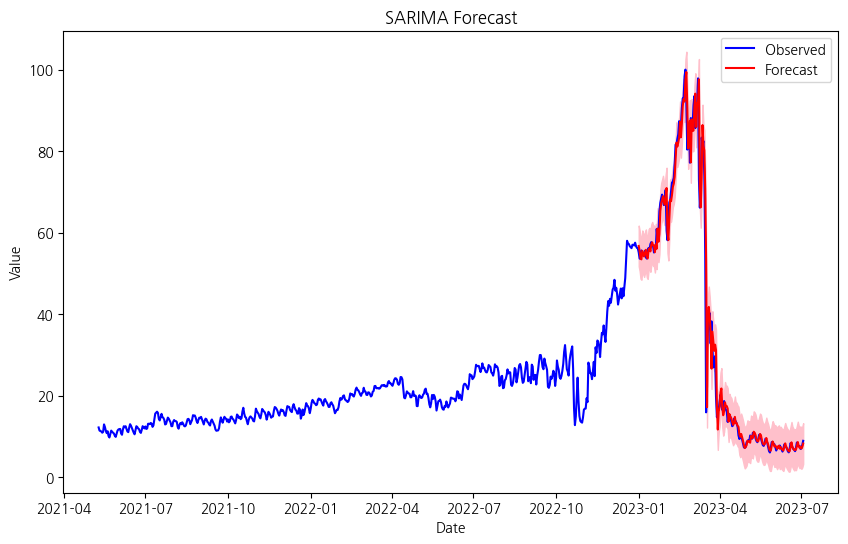

In [15]:
# Step 1: auto_arima를 사용하여 최적의 SARIMA 모델 찾기 (계절성 고려)
model_fit = auto_arima(ts, seasonal=True, m=1, suppress_warnings=True, stepwise=True)
order = model_fit.order
seasonal_order = model_fit.seasonal_order

# Step 2: 최적 모델로 SARIMAX 모델 구성
sarima_model = SARIMAX(ts, order=order, seasonal_order=seasonal_order)

# 모델 피팅
results = sarima_model.fit(disp=False)

# 1. get_prediction -> 구간을 설정하여 예측
# 2023-01-01부터 2023-07-03까지 예측
start_date = '2023-01-01'
end_date = '2023-07-03'
forecast = results.get_prediction(start=pd.to_datetime(start_date), end=pd.to_datetime(end_date), dynamic=False)

# 예측값과 신뢰구간(lower, upper) 출력
print(forecast.predicted_mean)
print(forecast.conf_int())

# 결과 시각화
plt.figure(figsize=(10, 6))
# 원본 데이터 플롯
plt.plot(ts, label='Observed', color='blue')
# 예측값 플롯
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
# 신뢰구간 플롯
plt.fill_between(forecast.conf_int().index, forecast.conf_int()['lower 디지털/가전'], forecast.conf_int()['upper 디지털/가전'], color='pink')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

D:\Anaconda\envs\pythonEx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\pythonEx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


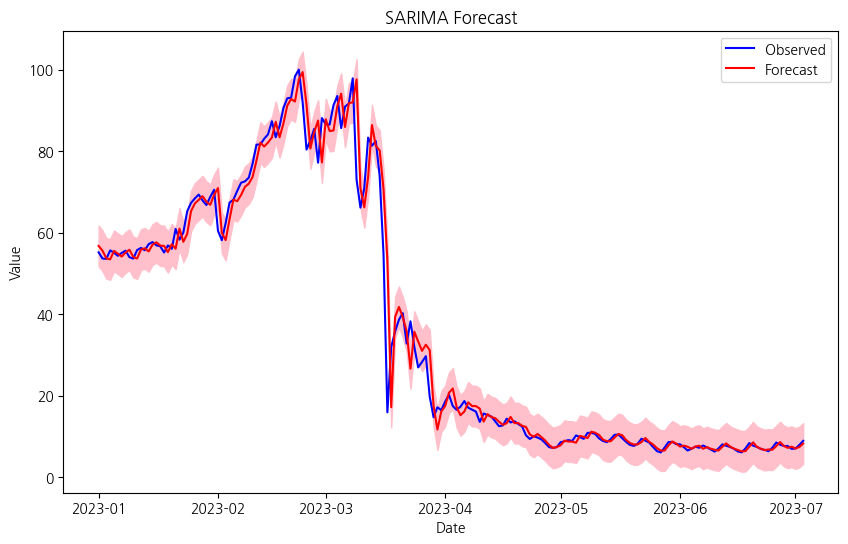

In [16]:
# Step 1: auto_arima를 사용하여 최적의 SARIMA 모델 찾기 (계절성 고려)
model_fit = auto_arima(ts, seasonal=True, m=1, suppress_warnings=True, stepwise=True)
order = model_fit.order
seasonal_order = model_fit.seasonal_order

# Step 2: 최적 모델로 SARIMAX 모델 구성
sarima_model = SARIMAX(ts, order=order, seasonal_order=seasonal_order)

# 모델 피팅
results = sarima_model.fit(disp=False)

# 1. get_prediction -> 구간을 설정하여 예측
# 2023-01-01부터 2023-07-03까지 예측
start_date = '2023-01-01'
end_date = '2023-07-03'
forecast = results.get_prediction(start=pd.to_datetime(start_date), end=pd.to_datetime(end_date), dynamic=False)

# 예측값과 신뢰구간(lower, upper) 출력
# print(forecast.predicted_mean)
# print(forecast.conf_int())

# 결과 시각화
plt.figure(figsize=(10, 6))
# 슬라이싱하여 해당 기간의 원본 데이터만 플롯
ts_start_date = ts[start_date:]
# 원본 데이터 플롯
plt.plot(ts_start_date, label='Observed', color='blue')
# 예측값 플롯
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
# 신뢰구간 플롯
plt.fill_between(forecast.conf_int().index, forecast.conf_int()['lower 디지털/가전'], forecast.conf_int()['upper 디지털/가전'], color='pink')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

In [17]:
# 구간예측값을 csv파일로 저장하기 위해 데이터프레임화
forecast_df = pd.DataFrame({
    'Predicted_Mean': forecast.predicted_mean,
    'Lower_CI': forecast.conf_int()['lower 디지털/가전'],
    'Upper_CI': forecast.conf_int()['upper 디지털/가전']
})

# CSV 파일로 저장
forecast_df.to_csv('forecast_results.csv', index=True, encoding = 'utf-8-sig')

### 위 구간 예측에 대한 MSE, RMSE

In [18]:

from sklearn.metrics import mean_squared_error

# 예측된 평균값들
predicted_mean_values = forecast.predicted_mean

# 실제 관측치 (ts)에서 해당 구간만 추출
# 여기서 start_date와 end_date는 해당 구간의 시작과 끝을 나타내는 변수입니다.
true_values = ts[start_date:end_date]

# Step 4: MSE (평균 제곱 오차) 계산
mse = mean_squared_error(true_values, predicted_mean_values)
print("Mean Squared Error (MSE):", mse)

# Step 5: RMSE (평균 제곱근 오차) 계산
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 22.622068865354787
Root Mean Squared Error (RMSE): 4.756266273596842


* MSE, RMSE값을 봤을때 문제가 될정도로 큰 값은 아니며, 최적의 모델이 원데이터와 비슷한 추세를 보이므로 해당 모델이 활용되는데 문제 없을것으로 판단됨

### 최적 모델로 미래 예측

D:\Anaconda\envs\pythonEx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\pythonEx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2023-07-04    8.970137
2023-07-05    8.658511
2023-07-06    8.218143
2023-07-07    7.977765
2023-07-08    8.096863
                ...   
2023-10-27    8.442884
2023-10-28    8.444027
2023-10-29    8.448817
2023-10-30    8.453513
2023-10-31    8.454717
Freq: D, Name: predicted_mean, Length: 120, dtype: float64
            lower 디지털/가전  upper 디지털/가전
2023-07-04      3.969160     13.971114
2023-07-05      1.449903     15.867118
2023-07-06     -0.498286     16.934573
2023-07-07     -1.774265     17.729795
2023-07-08     -2.447583     18.641310
...                  ...           ...
2023-10-27    -40.621085     57.506854
2023-10-28    -40.829435     57.717490
2023-10-29    -41.033262     57.930897
2023-10-30    -41.236774     58.143800
2023-10-31    -41.443458     58.352892

[120 rows x 2 columns]


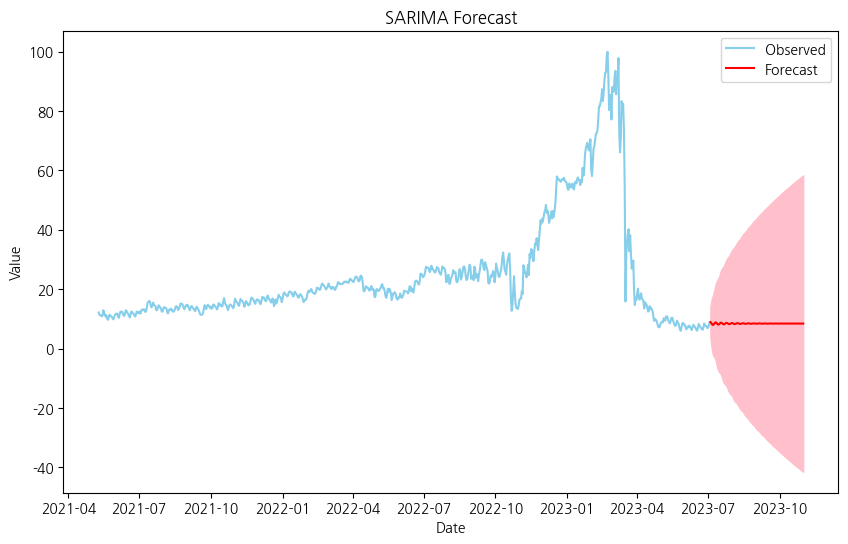

In [19]:
# Step 1: auto_arima를 사용하여 최적의 SARIMA 모델 찾기 (계절성 고려)
model_fit = auto_arima(ts, seasonal=True, m=1, suppress_warnings=True, stepwise=True)
order = model_fit.order
seasonal_order = model_fit.seasonal_order

# Step 2: 최적 모델로 SARIMAX 모델 구성
sarima_model = SARIMAX(ts, order=order, seasonal_order=seasonal_order)

# 모델 피팅
results = sarima_model.fit(disp=False)

# 마지막 데이터로부터 120일 예측
forecast_period = 120
forecast_future = results.get_forecast(steps=forecast_period)
print(forecast_future.predicted_mean)
print(forecast_future.conf_int())
# 결과 시각화
plt.figure(figsize=(10, 6))
# 원본 데이터 플롯
plt.plot(ts, label='Observed', color='skyblue')
# 예측값 플롯
plt.plot(forecast_future.predicted_mean, label='Forecast', color='red')
# 신뢰구간 플롯
plt.fill_between(forecast_future.conf_int().index, forecast_future.conf_int()['lower 디지털/가전'], forecast_future.conf_int()['upper 디지털/가전'], color='pink')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMA Forecast')
plt.legend()
# 음수기호 표현
plt.rcParams['axes.unicode_minus'] = False
plt.show()

* 최적의 모델로 향후 120일가량의 시차를 예측한 결과, 클릭률 특성상 대체적으로 일정할 것으로 예상되나, 신뢰구간의 편차가 큰 것으로보아, 특정 이벤트나 외부영향에 따라 클릭률에 변동이 있을것으로 예상되므로, 시계열모델의 예측은 보조적인 지표정도로만 참고하여 사용할 필요가 있다.

### 통합 그래프

* 통합그래프는 다음과 같이 출력할 수 있다.

D:\Anaconda\envs\pythonEx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\pythonEx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


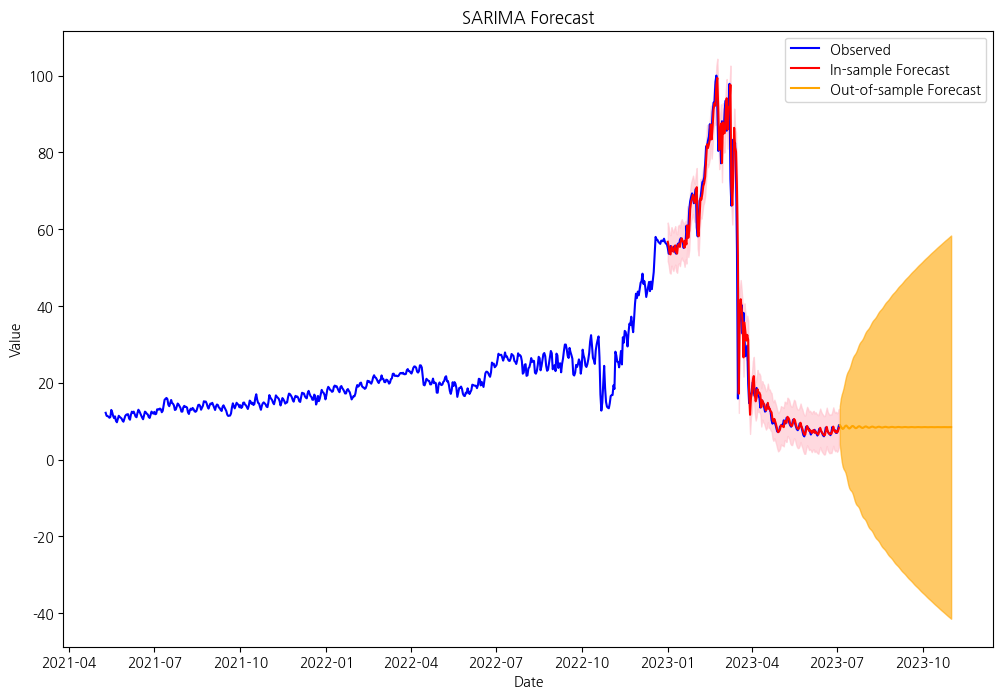

In [20]:
# Step 1: auto_arima를 사용하여 최적의 SARIMA 모델 찾기 (계절성 고려)
# Assuming 'ts' is your time series data
model_fit = auto_arima(ts, seasonal=True, m=1, suppress_warnings=True, stepwise=True)
order = model_fit.order
seasonal_order = model_fit.seasonal_order

# Step 2: 최적 모델로 SARIMAX 모델 구성
sarima_model = SARIMAX(ts, order=order, seasonal_order=seasonal_order)

# 모델 피팅
results = sarima_model.fit(disp=False)

# 1. get_prediction -> 구간을 설정하여 예측
# 2023-01-01부터 2023-07-03까지 예측
start_date = '2023-01-01'
end_date = '2023-07-03'
forecast = results.get_prediction(start=pd.to_datetime(start_date), end=pd.to_datetime(end_date), dynamic=False)

# 예측값과 신뢰구간(lower, upper) 출력
# print(forecast.predicted_mean)
# print(forecast.conf_int())

# 2. 마지막 데이터로부터 120일 예측
forecast_period = 120
forecast_future = results.get_forecast(steps=forecast_period)
# print(forecast_future.predicted_mean)
# print(forecast_future.conf_int())

# 결과 시각화
plt.figure(figsize=(12, 8))

# 원본 데이터 플롯
plt.plot(ts, label='Observed', color='blue')

# 예측값 플롯 (in-sample forecast)
plt.plot(forecast.predicted_mean, label='In-sample Forecast', color='red')

# 예측값 플롯 (out-of-sample forecast)
plt.plot(forecast_future.predicted_mean, label='Out-of-sample Forecast', color='orange')

# 신뢰구간 플롯 (in-sample)
plt.fill_between(forecast.conf_int().index, forecast.conf_int()['lower 디지털/가전'], forecast.conf_int()['upper 디지털/가전'], color='pink', alpha=0.6)

# 신뢰구간 플롯 (out-of-sample)
plt.fill_between(forecast_future.conf_int().index, forecast_future.conf_int()['lower 디지털/가전'], forecast_future.conf_int()['upper 디지털/가전'], color='orange', alpha=0.6)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMA Forecast')
plt.legend()
# 음수기호 표현
plt.rcParams['axes.unicode_minus'] = False
plt.show()

## 다른 카테고리와 비교

* 모델의 타당성확인을 위해 화장품/미용 품목에 대해 SARIMA(2,1,2)를 적용해봄

In [21]:
# 디지털/가전 항목의 시계열 데이터 프레임 생성
# ts_df1 = pd.pivot_table(data = df, index = 'period', values = '디지털/가전').reset_index()
# ts_df1.set_index('period')
timeSeries2 = df.loc[:, ['period', '화장품/미용']]
timeSeries2.index = timeSeries2.period
ts2 = timeSeries2.drop('period', axis = 1)

In [22]:
print(ts2)

             화장품/미용
period             
2021-05-10  3.29609
2021-05-11  3.15404
2021-05-12  3.03323
2021-05-13  2.88430
2021-05-14  2.70522
...             ...
2023-06-29  2.62158
2023-06-30  2.28731
2023-07-01  2.44349
2023-07-02  2.76642
2023-07-03  2.99459

[785 rows x 1 columns]


D:\Anaconda\envs\pythonEx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\pythonEx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\pythonEx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\pythonEx\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Anaconda\envs\pythonEx\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. 

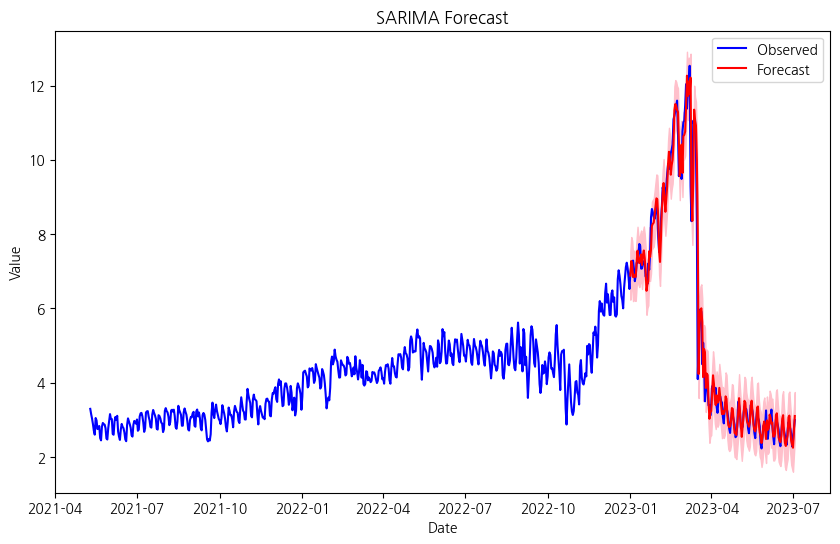

In [23]:
# Step 1: auto_arima를 사용하여 최적의 SARIMA 모델 찾기 (계절성 고려)
model_fit2 = sm.tsa.ARIMA(ts2, order=(2, 1, 2)).fit()
# 모델 피팅

# 2023-01-01부터 2023-07-03까지 예측
start_date = '2023-01-01'
end_date = '2023-07-03'
forecast = model_fit2.get_prediction(start=pd.to_datetime(start_date), end=pd.to_datetime(end_date), dynamic=False)

# 예측값과 신뢰구간(lower, upper) 출력
# print(forecast.predicted_mean)
# print(forecast.conf_int())

# 결과 시각화
plt.figure(figsize=(10, 6))
# 원본 데이터 플롯
plt.plot(ts2, label='Observed', color='blue')
# 예측값 플롯
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
# 신뢰구간 플롯
plt.fill_between(forecast.conf_int().index, forecast.conf_int()['lower 화장품/미용'], forecast.conf_int()['upper 화장품/미용'], color='pink')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

In [24]:
# 예측된 평균값들
predicted_mean_values = forecast.predicted_mean

# 실제 관측치 (ts)에서 해당 구간만 추출
# 여기서 start_date와 end_date는 해당 구간의 시작과 끝을 나타내는 변수입니다.
true_values = ts[start_date:end_date]

# Step 4: MSE (평균 제곱 오차) 계산
mse = mean_squared_error(true_values, predicted_mean_values)
print("Mean Squared Error (MSE):", mse)

# Step 5: RMSE (평균 제곱근 오차) 계산
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 1753.8467019953007
Root Mean Squared Error (RMSE): 41.87895297157393


- SARIMA(2,1,2)모델은 화장품/미용에서는 MSE와 RMSE가 다소 크게 추출됨
- 디지털/가전과 비교했을때 화장품/미용에는 적합한 형태의 모델이 아님을 확인

* 이번엔 생활/건강에 대해 대입

In [25]:
# 디지털/가전 항목의 시계열 데이터 프레임 생성
# ts_df1 = pd.pivot_table(data = df, index = 'period', values = '디지털/가전').reset_index()
# ts_df1.set_index('period')
timeSeries3 = df.loc[:, ['period', '생활/건강']]
timeSeries3.index = timeSeries3.period
ts3 = timeSeries3.drop('period', axis = 1)

D:\Anaconda\envs\pythonEx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\pythonEx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Anaconda\envs\pythonEx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


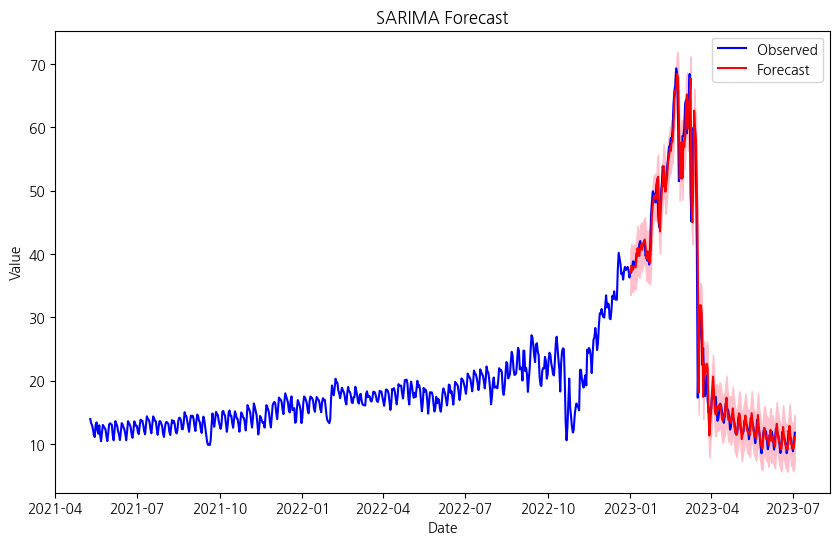

In [26]:
# Step 1: auto_arima를 사용하여 최적의 SARIMA 모델 찾기 (계절성 고려)
model_fit3 = sm.tsa.ARIMA(ts3, order=(2, 1, 2)).fit()
# 모델 피팅

# 2023-01-01부터 2023-07-03까지 예측
start_date = '2023-01-01'
end_date = '2023-07-03'
forecast = model_fit3.get_prediction(start=pd.to_datetime(start_date), end=pd.to_datetime(end_date), dynamic=False)

# 예측값과 신뢰구간(lower, upper) 출력
# print(forecast.predicted_mean)
# print(forecast.conf_int())

# 결과 시각화
plt.figure(figsize=(10, 6))
# 원본 데이터 플롯
plt.plot(ts3, label='Observed', color='blue')
# 예측값 플롯
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
# 신뢰구간 플롯
plt.fill_between(forecast.conf_int().index, forecast.conf_int()['lower 생활/건강'], forecast.conf_int()['upper 생활/건강'], color='pink')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

In [27]:
# 예측된 평균값들
predicted_mean_values = forecast.predicted_mean

# 실제 관측치 (ts)에서 해당 구간만 추출
# 여기서 start_date와 end_date는 해당 구간의 시작과 끝을 나타내는 변수입니다.
true_values = ts[start_date:end_date]

# Step 4: MSE (평균 제곱 오차) 계산
mse = mean_squared_error(true_values, predicted_mean_values)
print("Mean Squared Error (MSE):", mse)

# Step 5: RMSE (평균 제곱근 오차) 계산
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 220.81550565729088
Root Mean Squared Error (RMSE): 14.859862235474825


* 생활/건강도 여전히 오차값들이 크지만 화장품/미용에 비해 작으므로 화장품/미용과 비교했을때 상대적으로 SARIMA(2,1,2)모델을 적용할 순 있다고 생각됨